In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
# Define the path to the Excel file
file_path = "C:\Data Analyst training\RandomForest_training\Data\Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_churndata'

# Read the data from the specified sheet into a pandas DataFrame
data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(data.head())


  customer_id  gender  age married        state  number_of_referrals  \
0   19877-DEL    Male   35      No        Delhi                    7   
1   58353-MAH  Female   45     Yes  Maharashtra                   14   
2   25063-WES    Male   51      No  West Bengal                    4   
3   59787-KAR    Male   79      No    Karnataka                    3   
4   28544-TAM  Female   80      No   Tamil Nadu                    3   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                27       None           Yes             No  ...   
1                13       None           Yes            Yes  ...   
2                35     Deal 5           Yes             No  ...   
3                21     Deal 4           Yes             No  ...   
4                 8       None           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0      Credit Card           65.6        593.30          0.00   
1      Credit Card          

In [15]:
# Drop columns that won't be used for prediction
data = data.drop(['customer_id', 'churn_category', 'churn_reason'], axis=1)

# List of columns to be label encoded
columns_to_encode = [
    'gender', 'married', 'state', 'value_deal', 'phone_service', 'multiple_lines',
    'internet_service', 'internet_type', 'online_security', 'online_backup',
    'device_protection_plan', 'premium_support', 'streaming_tv', 'streaming_movies',
    'streaming_music', 'unlimited_data', 'contract', 'paperless_billing',
    'payment_method'
]

# Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Manually encode the target variable 'Customer_Status'
data['customer_status'] = data['customer_status'].map({'Stayed': 0, 'Churned': 1})

# Split data into features and target
X = data.drop('customer_status', axis=1)
y = data['customer_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Confusion Matrix:
[[809  50]
 [118 225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.94      0.91       859
           1       0.82      0.66      0.73       343

    accuracy                           0.86      1202
   macro avg       0.85      0.80      0.82      1202
weighted avg       0.86      0.86      0.86      1202



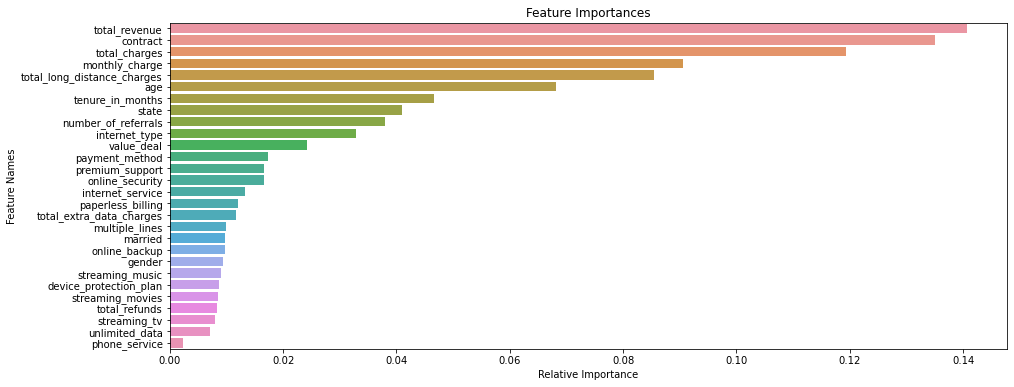

In [11]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Selection using Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(15, 6))
sns.barplot(x=importances[indices], y=X.columns[indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.ylabel('Feature Names')
plt.show()

In [18]:
# Define the path to the Joiner Data Excel file
file_path = "C:\Data Analyst training\RandomForest_training\Data\Prediction_Data.xlsx"

# Define the sheet name to read data from
sheet_name = 'vw_joindata'

# Read the data from the specified sheet into a pandas DataFrame
new_data = pd.read_excel(file_path, sheet_name=sheet_name)

# Display the first few rows of the fetched data
print(new_data.head())

# Retain the original DataFrame to preserve unencoded columns
original_data = new_data.copy()

# Retain the Customer_ID column
customer_ids = new_data['customer_id']

# Drop columns that won't be used for prediction in the encoded DataFrame
new_data = new_data.drop(['customer_id', 'customer_status', 'churn_category', 'churn_reason'], axis=1)

# Encode categorical variables using the saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

# Make predictions
new_predictions = rf_model.predict(new_data)

# Add predictions to the original DataFrame
original_data['Customer_Status_Predicted'] = new_predictions

# Filter the DataFrame to include only records predicted as "Churned"
original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
original_data.to_csv("C:\Data Analyst training\RandomForest_training\Data\Predictions.csv", index=False)


  customer_id  gender  age married           state  number_of_referrals  \
0   93520-GUJ  Female   67      No         Gujarat                   13   
1   57256-BIH  Female   18      No           Bihar                    9   
2   72357-MAD  Female   53      No  Madhya Pradesh                   14   
3   66612-KAR  Female   58     Yes       Karnataka                   11   
4   22119-WES    Male   31     Yes     West Bengal                    5   

   tenure_in_months value_deal phone_service multiple_lines  ...  \
0                19     Deal 5           Yes            Yes  ...   
1                 7       None           Yes             No  ...   
2                12     Deal 5           Yes             No  ...   
3                18       None           Yes             No  ...   
4                 5       None           Yes             No  ...   

    payment_method monthly_charge total_charges total_refunds  \
0  Bank Withdrawal          72.10          72.1           0.0   
1      Cre